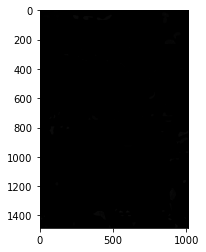

In [7]:
from matplotlib import pyplot as plt
import numpy as np
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
from PIL import *
scene_infile = open("Data-20200512T142504Z-001/Data/Train1016x1485.raw",'rb')
scene_test = open("Data-20200512T142504Z-001/Data/Test1016x1485.raw",'rb')
scene_infile_1 = open("Data-20200512T142504Z-001/Data/1.raw",'rb')
scene_infile_2 = open("Data-20200512T142504Z-001/Data/2.raw",'rb')
scene_infile_3 = open("Data-20200512T142504Z-001/Data/3.raw",'rb')
scene_infile_4 = open("Data-20200512T142504Z-001/Data/4.raw",'rb')
scene_infile_5 = open("Data-20200512T142504Z-001/Data/5.raw",'rb')
scene_image_array = np.fromfile(scene_infile,dtype=np.uint8,count=1016*1485)
scene_image_test_array = np.fromfile(scene_test,dtype=np.uint8,count=1016*1485)
scene_image_array_1 = np.fromfile(scene_infile_1,dtype=np.uint8,count=1016*1485)
scene_image_array_2 = np.fromfile(scene_infile_2,dtype=np.uint8,count=1016*1485)
scene_image_array_3 = np.fromfile(scene_infile_3,dtype=np.uint8,count=1016*1485)
scene_image_array_4 = np.fromfile(scene_infile_4,dtype=np.uint8,count=1016*1485)
scene_image_array_5 = np.fromfile(scene_infile_5,dtype=np.uint8,count=1016*1485)
scene_image=Image.frombuffer("I",(1016,1485),scene_image_array.astype('I'),'raw','I',0,1)
plt.imshow(scene_image)
plt.show()
f = open('all_test_data_.csv','w')
f.write('x,y,label,value1,value2,value3,value4,value5\n')
#for i in range(1485):
#    for j in range(1016):
#        f.write(str(i)+','+str(j)+','+str(scene_image_array[i*j])+','+str(scene_image_array_1[i*j])+','+str(scene_image_array_2[i*j])+','+str(scene_image_array_3[i*j])+','+str(scene_image_array_4[i*j])+','+str(scene_image_array_5[i*j])+'\n')
#f.close()  

for i in range(1485):
    for j in range(1016):
        f.write(str(i)+','+str(j)+','+str(scene_image_test_array[i*j])+','+str(scene_image_array_1[i*j])+','+str(scene_image_array_2[i*j])+','+str(scene_image_array_3[i*j])+','+str(scene_image_array_4[i*j])+','+str(scene_image_array_5[i*j])+'\n')
f.close()


In [8]:
f = open('Data1.csv', 'w')
for i in range(1032,1485):
    for j in range(1016):
         f.write(str(i)+','+str(j)+','+str(scene_image_array[i*j])+'\n')
f.close()

In [1]:
import pandas as pd
f = pd.read_csv('Data1.csv')
f.shape


(460247, 3)

--- First 5 rows ---
   x  y  label
0  0  0      2
1  0  1      2
2  0  2      2
3  0  3      2
4  0  4      2

--- Shape of data set ---
(1508760, 3)

--- Class distribution ---
label
0     1458896
1        5348
2       12725
3         608
4         223
5       12597
6         599
7        3091
8         588
9         362
10      12493
11       1134
12         42
13          7
14         47
dtype: int64


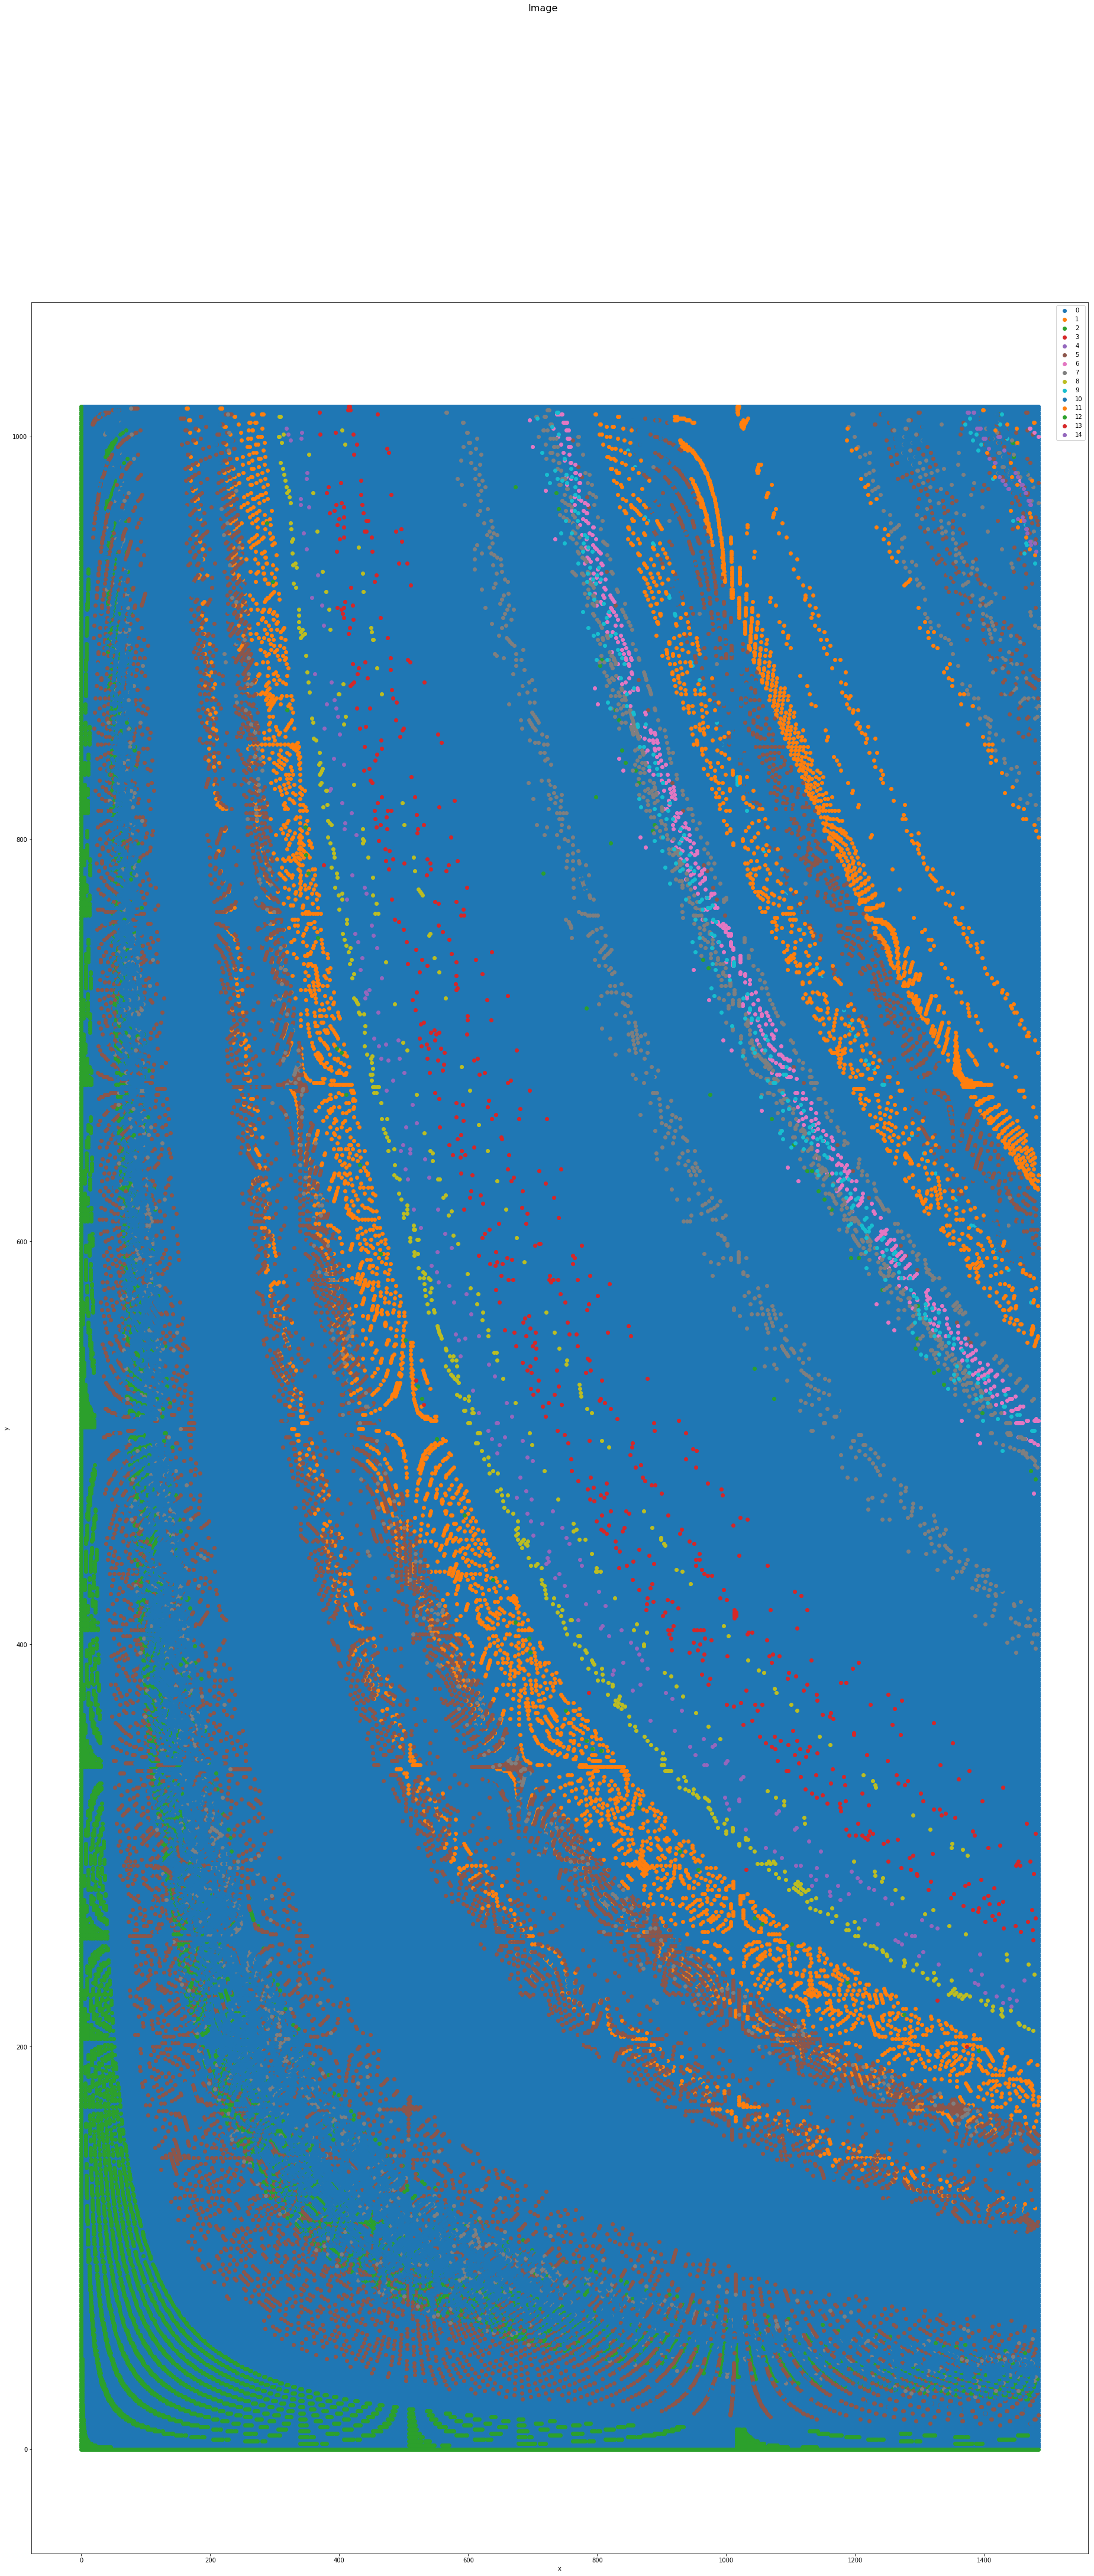

<Figure size 432x288 with 0 Axes>

In [5]:
import pandas
from matplotlib import pyplot as plt
ds = pandas.read_csv('Data.csv')

# Print first 5 rows in data set
print('--- First 5 rows ---')
print(ds.head())

# Print the shape
print('\n--- Shape of data set ---')
print(ds.shape)

# Print class distribution
print('\n--- Class distribution ---')
print(ds.groupby('label').size())
figure = plt.figure(figsize = (32, 70))
figure.suptitle('Image', fontsize=16)
grouped_dataset = ds.groupby('label')
labels = ['0', '1', '2','3','4','5','6','7','8','9','10','11','12','13','14']
for i, group in grouped_dataset:
    plt.scatter(group['x'], group['y'], label=labels[int(i)])
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()
plt.savefig('Img.png')

In [1]:
import pandas
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network



In [ ]:
import pandas
import numpy as np
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import keras

# Train and evaluate
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    
    # layers (Functional API)
    inputs = keras.layers.Input(shape=(5,), dtype='float32', name='input_layer') # Input (5 dimensions)
    outputs = keras.layers.Dense(128, activation='relu',name='hidden_layer')(inputs) # Hidden_layer
    outputs = keras.layers.Dense(13, activation='softmax', name='output_layer')(outputs) # Output layer (11 labels)

    # model from input layer and output layers
    model = keras.models.Model(inputs=inputs, outputs=outputs, name='neural_network')

    # Compile the model (binary_crossentropy if 2 classes)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # labels to categorical: categorical_crossentropy expects targets 
    # (Y_binary)binary matrices (1s and 0s) of shape (samples, classes)
    Y_binary = keras.utils.to_categorical(Y_train, num_classes=13, dtype='int')

    # Train model (output debug information)
    model.fit(X_train, Y_binary, batch_size=8, epochs=80, verbose=1)

    # Save the model (Make sure that the folder exists)
    model.save('models/keras_nn6.jbl')

    # training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(Y_train, np.argmax(predictions, axis=1))
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_train, np.argmax(predictions, axis=1)))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train, np.argmax(predictions, axis=1)))
    print('')

    # test data
    print('\n---- Test data ----')
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(Y_test, np.argmax(predictions, axis=1))
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_test, np.argmax(predictions, axis=1)))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test, np.argmax(predictions, axis=1)))
def main():

    # Load data set (includes header values)
    dataset = pandas.read_csv('all_data_no_zero_no_fourteen_no_thirteen_no_nine.csv')
    # Slice data set in data and labels (2D-array)
    X= dataset.values[:,[7,8,9,10,11]].astype(int) # Data
    Y= dataset.values[:,6].astype(int) # Labels

    #Split data set in train and test (use random state to get the same split every time, and stratify to keep balance)
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=5, stratify=Y)

    # Make sure that data still is balanced
    print('\n--- Class balance ---')
    print(np.unique(Y_train, return_counts=True))
    print(np.unique(Y_test, return_counts=True))

    # Train and evaluate
    train_and_evaluate(X_train, Y_train, X_test, Y_test)
if __name__ == "__main__": main()


In [10]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [8]:
import pandas as pd 
  
# Read the csv file and construct the  
# dataframe 
df = pd.read_csv('all_test_data_.csv') 
df.drop(df[df['label']==0].index, inplace = True)
df.to_csv('all_test_data_no_zero.csv')

In [6]:
import pandas
import numpy as np
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import keras
model = keras.models.load_model('models/keras_nn6.jbl')
dataset = pandas.read_csv('all_data_no_zero_no_fourteen_no_thirteen_no_nine.csv')
    # Slice data set in data and labels (2D-array)
X_train= dataset.values[:,[7,8,9,10,11]].astype(int) # Data
Y_train= dataset.values[:,6].astype(int) # Labels
predictions= model.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(Y_train, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_train, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_train, np.argmax(predictions, axis=1)))
print('')



Accuracy: 83.03
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.97      8592
           2       0.88      0.95      0.91     28244
           3       0.95      0.93      0.94      2256
           4       0.95      0.91      0.93       645
           5       0.83      0.91      0.86     22602
           6       0.75      0.57      0.65     13328
           7       0.67      0.81      0.74     12025
           8       0.95      0.99      0.97      2625
          10       0.80      0.79      0.79     24518
          11       0.93      0.60      0.73      9990
          12       0.97      0.77      0.86      1359

   micro avg       0.83      0.83      0.83    126184
   macro avg       0.88      0.84      0.85    126184
weighted avg       0.83      0.83      0.83    126184

Confusion Matrix:
[[ 8466     0     0     0     0     5    44     0    77     0     0]
 [    0 26786     0     0     0  1458     0     0     0     0

In [32]:
f.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#load the model
model = keras.models.load_model('models/keras_nn6.jbl')
    

# Calculate
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
# Make predictions
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot diagram
fig = plt.figure(figsize = (12, 8))
plt.contourf(xx, yy, Z, cmap='ocean', alpha=0.25)
plt.contour(xx, yy, Z, colors='w', linewidths=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='Spectral')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.save('mlp_classifier.png')
